In [1]:
# ============================
# 1. Import Required Libraries
# ============================
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# ============================
# 2. Load Dataset
# ============================
data_path = 'customer_churn_dataset-testing-master.csv'
df = pd.read_csv(data_path)

In [3]:
# ============================
# 3. Basic Data Overview
# ============================

print("\n--- Basic Info ---")
print(df.info())

print("\n--- First 5 Rows ---")
print(df.head())

print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- Duplicates ---")
print(df.duplicated().sum())

print("\n--- Summary Statistics ---")
print(df.describe())




--- Basic Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB
None

--- First 5 Rows ---
   CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
0           1   22  Female      25               14              4

In [4]:
# ============================
# 4. Data Cleaning
# ============================
# Check and handle missing values
df = df.drop_duplicates()
df = df.dropna()

# Convert categorical values where necessary (ensure Churn is numeric)
if df['Churn'].dtype == 'object':
    df['Churn'] = df['Churn'].replace({'Yes':1, 'No':0, 'Exited':1, 'Stayed':0})

C:\Users\Yusoyu\AppData\Local\Temp\ipykernel_21140\3485146726.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='coolwarm')


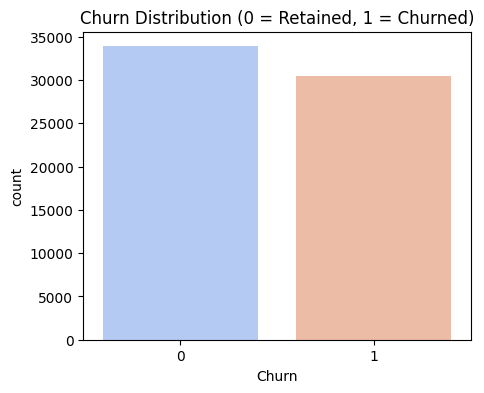

Churn rate: 47.37%


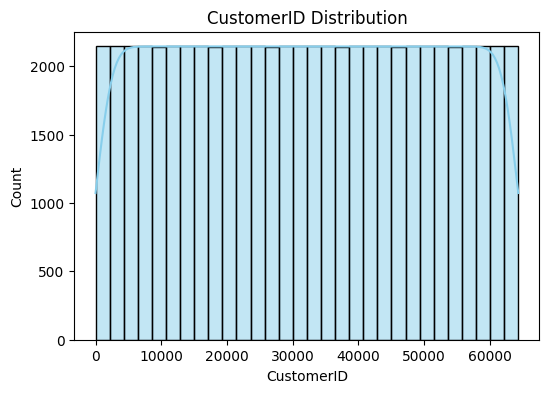

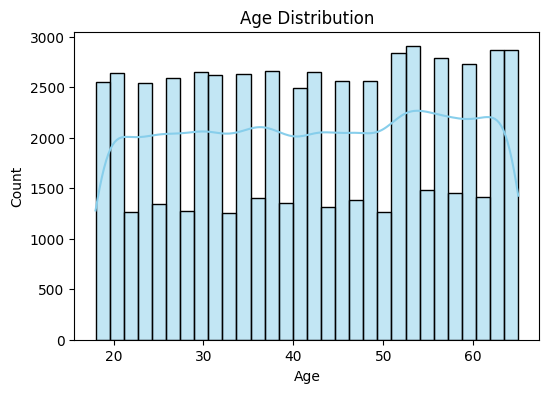

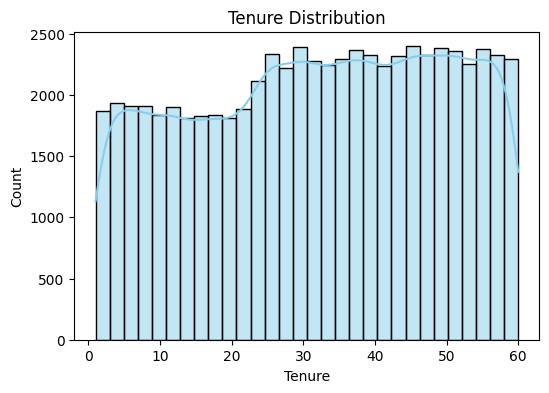

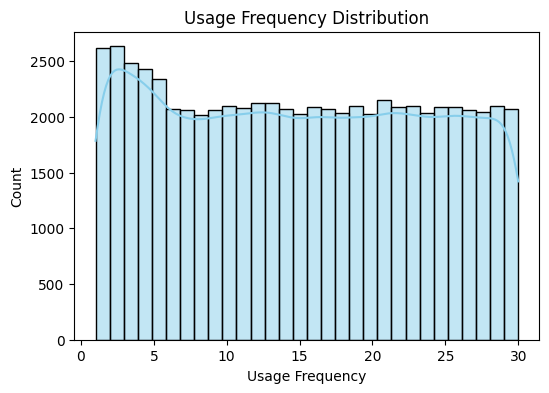

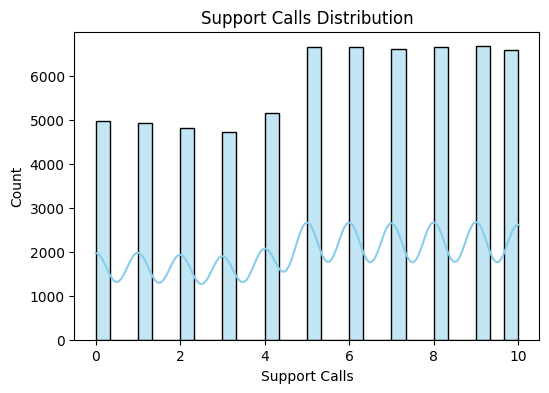

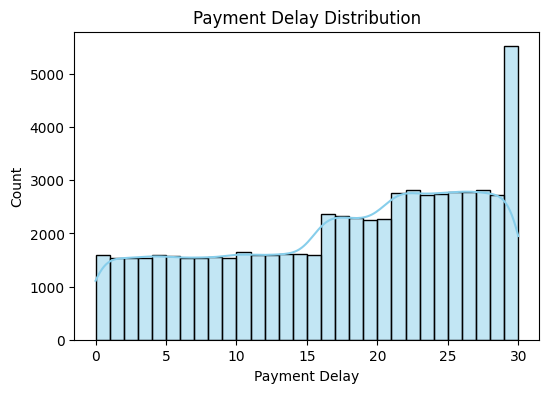

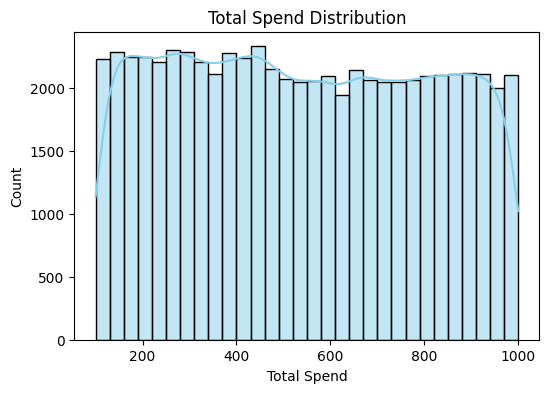

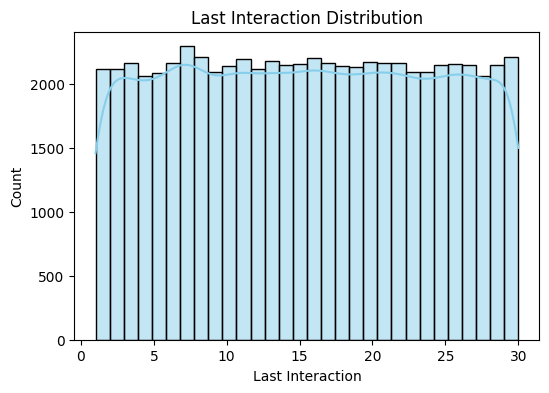

<Figure size 800x400 with 0 Axes>

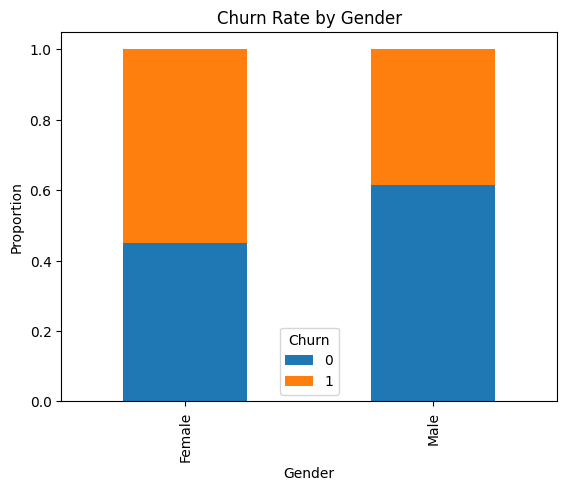

<Figure size 800x400 with 0 Axes>

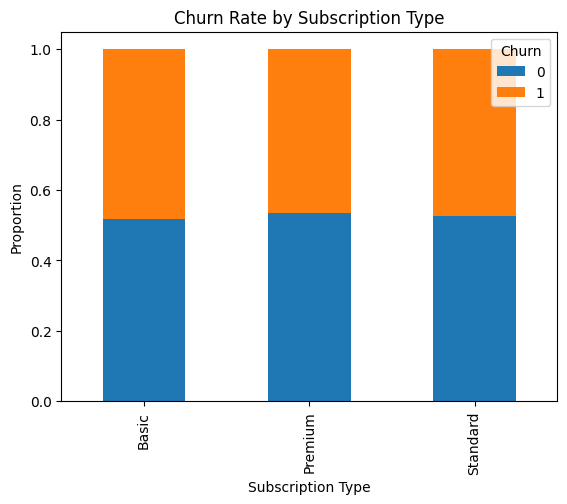

<Figure size 800x400 with 0 Axes>

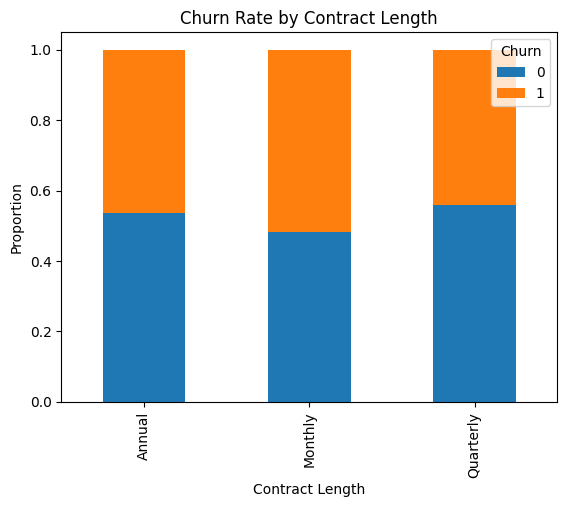

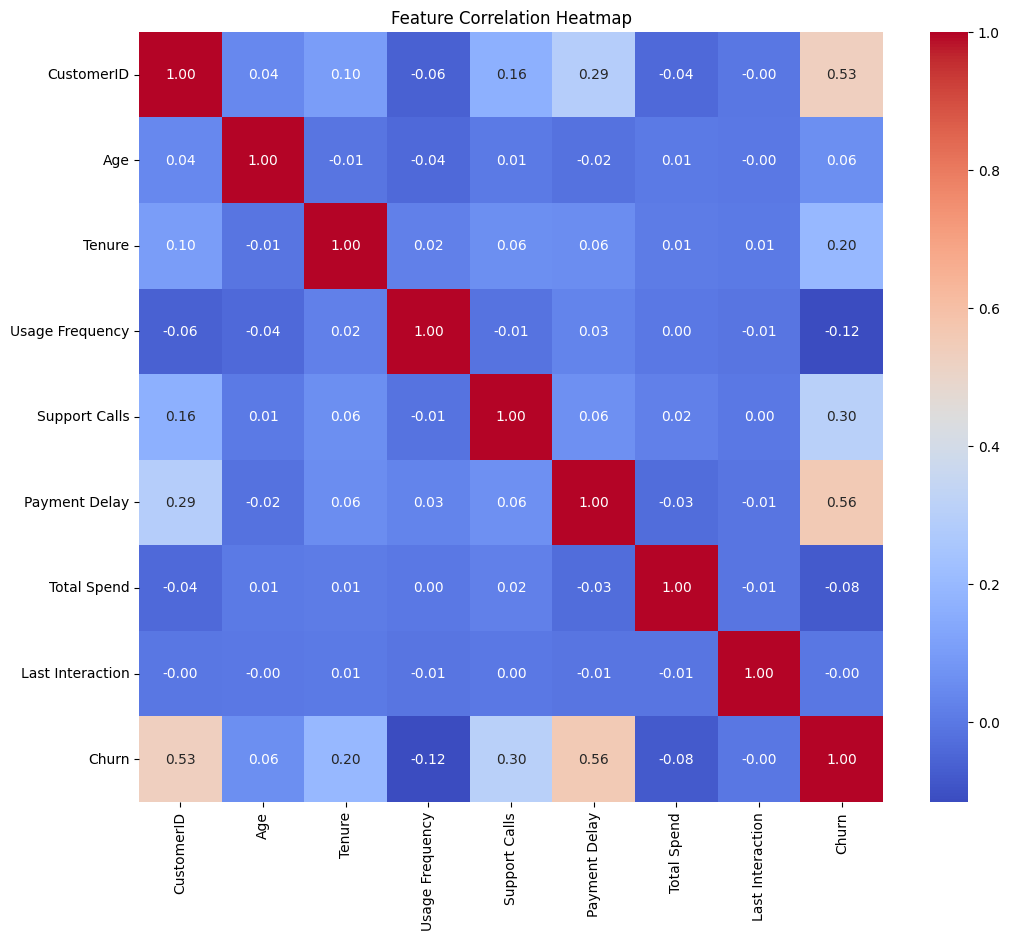

In [5]:
# ============================
# 5. Exploratory Data Analysis (EDA)
# ============================


# Target distribution
plt.figure(figsize=(5,4))
sns.countplot(x='Churn', data=df, palette='coolwarm')
plt.title('Churn Distribution (0 = Retained, 1 = Churned)')
plt.show()


# Basic churn ratio
churn_rate = df['Churn'].mean()
print(f"Churn rate: {churn_rate:.2%}")


# Numerical Features Distribution
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_cols = [c for c in num_cols if c != 'Churn']


for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'{col} Distribution')
    plt.show()


# Categorical Features vs Target
cat_cols = df.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
    plt.figure(figsize=(8,4))
    churn_rate_table = df.groupby(col)['Churn'].value_counts(normalize=True).unstack().fillna(0)
    churn_rate_table.plot(kind='bar', stacked=True)
    plt.title(f'Churn Rate by {col}')
    plt.ylabel('Proportion')
    plt.show()


# Correlation Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
# ============================
# 6. Data Preprocessing
# ============================


# Encode categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


# Split data
X = df.drop('Churn', axis=1)
y = df['Churn']


# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


print("\nData is cleaned, encoded, scaled, and ready for modeling.")
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


✅ Data is cleaned, encoded, scaled, and ready for modeling.
Training samples: 51499, Testing samples: 12875


In [8]:
# ============================
# 7. Save Cleaned Dataset
# ============================
cleaned_df = pd.DataFrame(X, columns=df.drop('Churn', axis=1).columns)
cleaned_df['Churn'] = y
cleaned_df.to_csv('cleaned_customer_churn.csv', index=False)
print("\nCleaned dataset saved as 'cleaned_customer_churn.csv'")


Cleaned dataset saved as 'cleaned_customer_churn.csv'
